   % NSEC1-3  % No Car  Dep Rank  Distance betas    Jobs  % Cath Diff  \
X                                                                       
0    -0.0176    0.2241   -2.5189         -3.1202  1.0739      -1.4281   
1    -0.3716    2.9571    3.0359         -1.7283  0.2339       0.2362   
2    -8.6380    1.1975    2.8496         -3.9753  0.1550       0.0408   
3    -3.9572    0.0863    1.5667         -1.6709  0.4186      -0.0143   
4    -0.9996   -3.3614   -5.5685         -2.1918  1.4343       0.4365   

   Pop Dens  Rd Dist to EC  Workers  pseudoR2  
X                                              
0    0.1436         1.6750   7.1493    0.9905  
1   -0.2257         0.3262   1.2786    0.9768  
2    0.0563         1.0910  10.7147    0.9953  
3    0.4165         1.0658   4.1729    0.9735  
4    0.6390         1.4183  13.5578    0.9932  
100.00000000000003
[[22.153996136333205, 58.55812352120291, 71.70284157032867, 81.7711049967761, 84.92561016856413, 94.14200536049162, 96.33918489964417

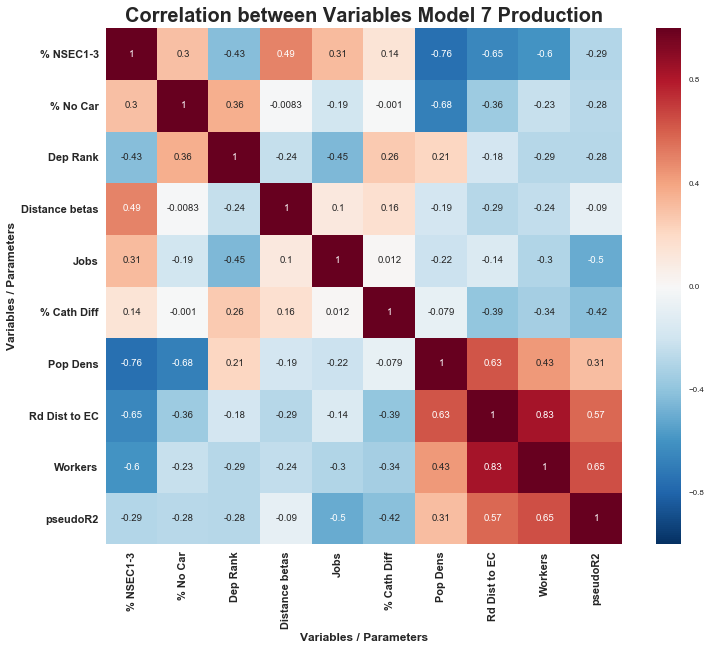

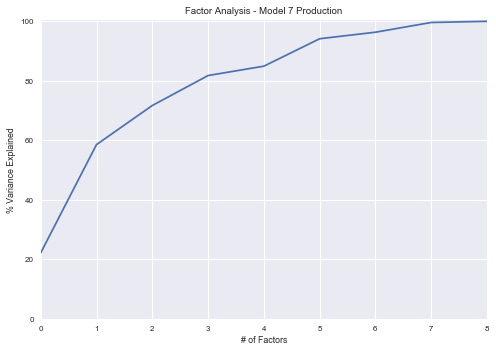

In [5]:
#https://www.kaggle.com/nirajvermafcb/principal-component-analysis-with-scikit-learn
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Factor Analysis - Part 1 - Correlation Matrix

#%load_ext rpy2.ipython
from sklearn import decomposition, preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#load functional region demographic data (as created in stage 3)
SIMdata = pd.read_csv('M7_reg20kEBANN_Production.csv', index_col=0)

#drop unnecessary columns
SIMdata = SIMdata.drop(columns=['Destination'])

print SIMdata.head()
data_normal = preprocessing.scale(SIMdata) # Normalization
#calculate factor analysis based on input functional region data
fa = decomposition.FactorAnalysis(n_components=9)
fa.fit(data_normal)
#print fa.components_ # Factor loadings
#print fa.score # Factor scores

# Compute data covariance with the Factor Analysis model.
covar = fa.get_covariance()
# print covar

# pandas dataframe correlation - Compute pairwise correlation of columns, excluding NA/null values.
SIMdata.corr()
correlation = SIMdata.corr()
plt.figure(figsize=(12,9.5)) #set figure size
sns.set(font_scale=0.8) #set font size

#generate correlation heatmap with annotation and red-blue shading
g = sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='RdBu_r')

#set axis labels, fonts, and plot title
plt.xticks(fontsize =11, fontweight="bold", rotation=90)
plt.yticks(fontsize =11, fontweight="bold")
plt.title('Correlation between Variables Model 7 Production', fontsize = 20, fontweight="bold")
plt.xlabel('Variables / Parameters', fontsize = 12, fontweight="bold")
plt.ylabel('Variables / Parameters', fontsize = 12, fontweight="bold")

#save correlation matrix plot to image
plt.savefig('M7_PROD.png', dpi=100)




# Factor Analysis - Part 2 - Cumulative variance

#https://stackoverflow.com/questions/41388997/factor-analysis-in-sklearn-explained-variance/42224525
m = fa.components_ #components matrix
n = fa.noise_variance_ #noise variance
m1 = m**2 #matrix squared
m2 = np.sum(m1,axis=1) #sum of each of the columns of m1

# calculate % variance of each factor
pvar1 = (100*m2[0])/np.sum(m2) # % variance of 1st factor
pvar2 = (100*m2[1])/np.sum(m2) # % variance of 2nd factor
pvar3 = (100*m2[2])/np.sum(m2) # % variance of 3rd factor
pvar4 = (100*m2[3])/np.sum(m2) # % variance of 4th factor
pvar5 = (100*m2[4])/np.sum(m2) # % variance of 5th factor
pvar6 = (100*m2[5])/np.sum(m2) # % variance of 6th factor
pvar7 = (100*m2[6])/np.sum(m2) # % variance of 7th factor
pvar8 = (100*m2[7])/np.sum(m2) # % variance of 8th factor
pvar9 = (100*m2[8])/np.sum(m2) # % variance of 9th factor
Totalvar = pvar1 + pvar2 + pvar3 + pvar4 + pvar5 + pvar6 + pvar7 + pvar8 + pvar9
print Totalvar


# calculate cumulative variance from factors
cumvar12 = pvar1 + pvar2
cumvar123 = cumvar12 + pvar3
cumvar1234 = cumvar123 + pvar4
cumvar12345 = cumvar1234 + pvar5
cumvar123456 = cumvar12345 + pvar6
cumvar1234567 = cumvar123456 + pvar7
cumvar12345678 = cumvar1234567 + pvar8
cumvar123456789 = cumvar12345678 + pvar9
list=[[pvar1,cumvar12,cumvar123,cumvar1234,cumvar12345,cumvar123456,cumvar1234567,cumvar12345678,cumvar123456789]]
print list


# create and save cumulative variance plot
plt.figure()
plt.ylabel('% Variance Explained')
plt.xlabel('# of Factors')
plt.title('Factor Analysis - Model 7 Production')
plt.ylim(0,100.5)
plt.xlim(0,8)
plt.style.context('seaborn-whitegrid')
plt.plot(list[0])
plt.savefig('M7_Prod_fa_CVar.png')